In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc


# ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [58]:
#pip install sklearn

In [59]:
#df = pd.read_csv('../Project/creditcard.csv')

#df.head()

In [60]:
from google.colab import drive
drive.mount("/content/drive/")

proj_path = '/content/drive/MyDrive/Colab Notebooks/'
df = pd.read_csv(proj_path +'creditcard.csv')

df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Density plot of Time')

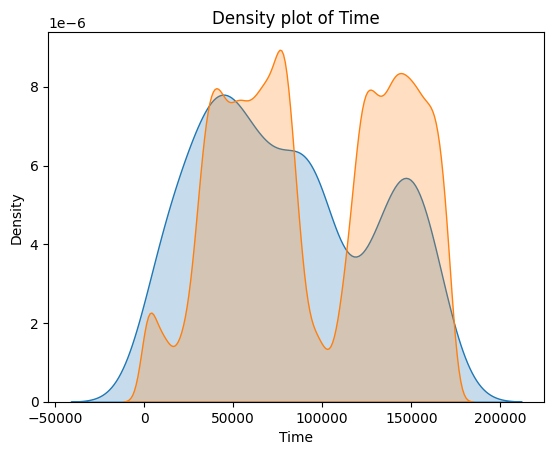

In [61]:
df1 = df[df['Class'] == 1]
sns.kdeplot(df1['Time'], shade=True)
sns.kdeplot(df['Time'], shade=True)
plt.title('Density plot of Time')


Text(0.5, 1.0, 'Density plot of all data')

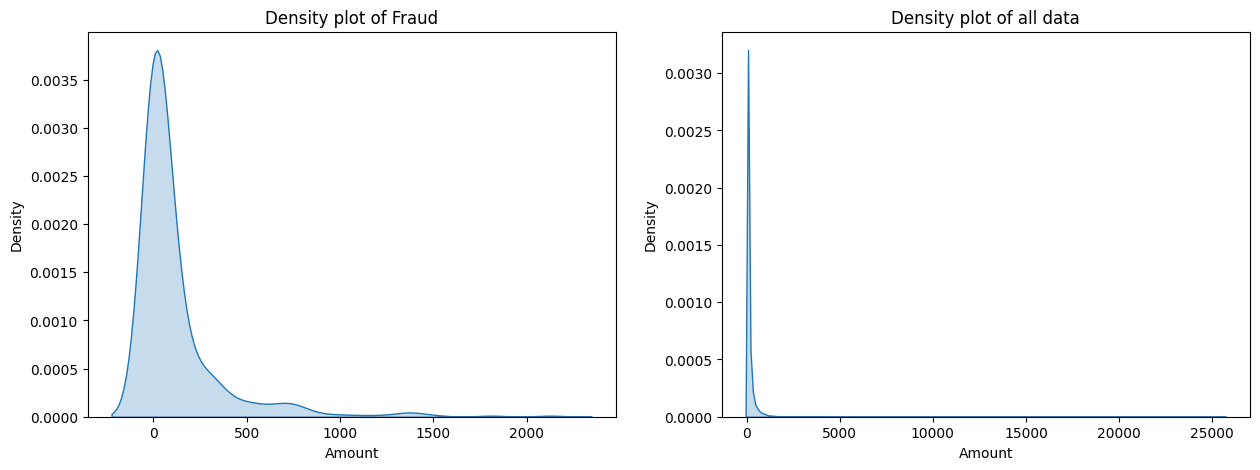

In [62]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# plot the first density plot on the first subplot
sns.kdeplot(df1['Amount'], shade=True, ax=axs[0])

# plot the second density plot on the second subplot
sns.kdeplot(df['Amount'], shade=True, ax=axs[1])

# set the titles of the subplots
axs[0].set_title('Density plot of Fraud')
axs[1].set_title('Density plot of all data')

Class Distribution:
0    284315
1       492
Name: Class, dtype: int64


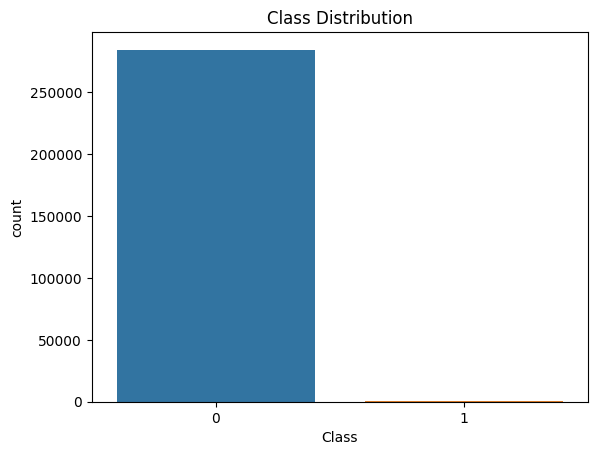

In [63]:
# Check the distribution of the target variable ('Class'):

print("Class Distribution:")
print(df['Class'].value_counts())

# Plot the class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()


<ipython-input-64-f52df065ba2a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], ax=axes[0], color='blue')
<ipython-input-64-f52df065ba2a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], ax=axes[1], color='red')


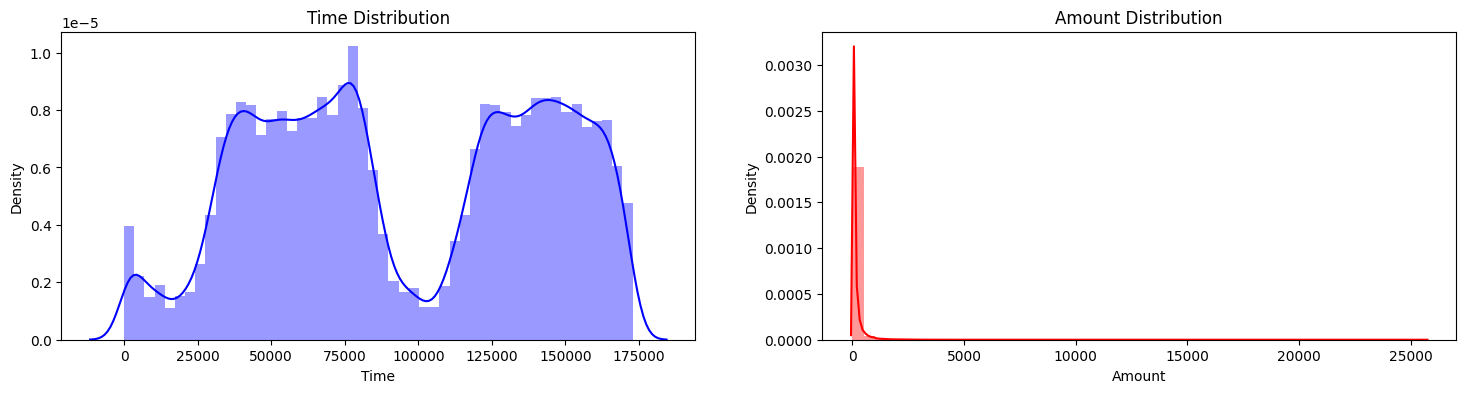

In [64]:

# Analyze the distribution of 'Time' and 'Amount' features:

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.distplot(df['Time'], ax=axes[0], color='blue')
axes[0].set_title("Time Distribution")

sns.distplot(df['Amount'], ax=axes[1], color='red')
axes[1].set_title("Amount Distribution")

plt.show()


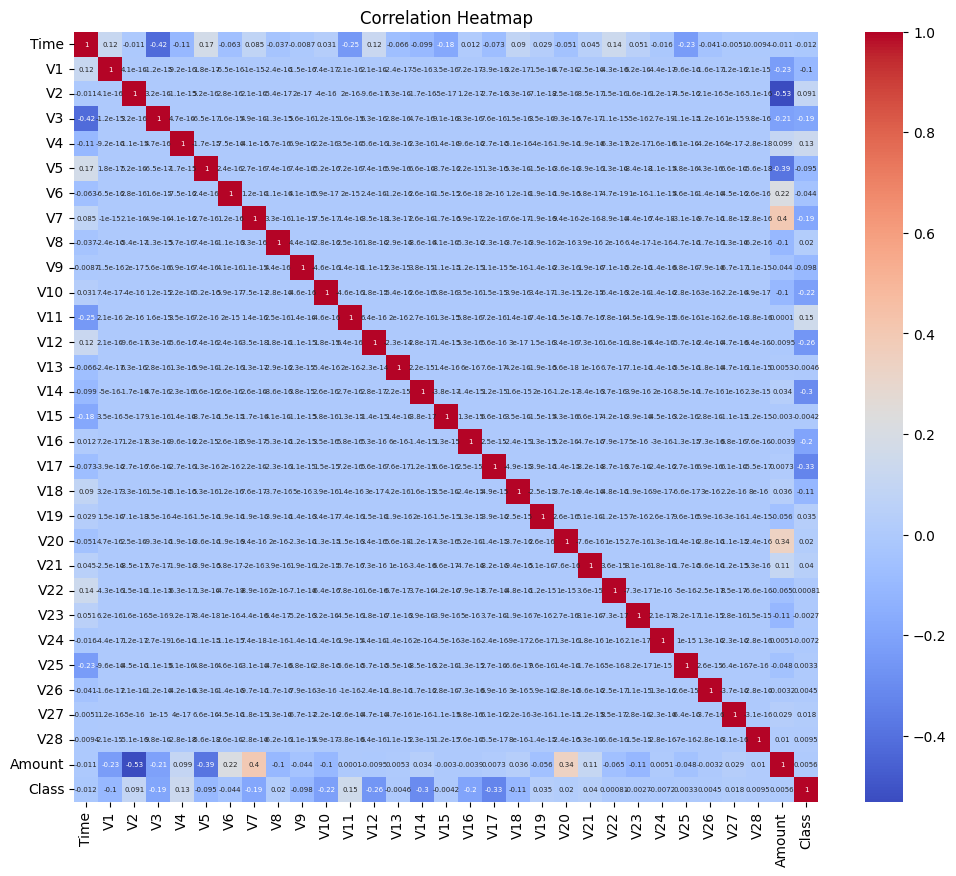

In [65]:
# Check the correlation between features:

corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':5})
plt.title("Correlation Heatmap")
plt.show()





In [66]:
# Normalize the 'Time' and 'Amount' features:

scaler = StandardScaler()

df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


In [67]:
# Split the dataset into train and test sets:
random.seed(586)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train set and test set shapes
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (227845, 30)
Test set shape: (56962, 30)


In [68]:
# Convert data to PyTorch tensors

X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float).unsqueeze(1)

In [69]:
# Create a custom dataset class and data loaders:

class CreditCardDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

train_dataset = CreditCardDataset(X_train, y_train)
test_dataset = CreditCardDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [70]:
# Define the LSTM model:

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.5)  # Adding a dropout layer
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)  # Adding an additional fully connected layer
        self.fc2 = nn.Linear(hidden_size // 2, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(x.device)

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out[:, -1, :])  # Apply dropout after the LSTM layer
        out = self.fc1(out)  # Pass the output through the first fully connected layer
        out = torch.relu(out)  # Apply ReLU activation function
        out = self.fc2(out)  # Pass the output through the second fully connected layer
        return out


In [71]:
# Instantiate the model, loss function, and optimizer:
model = LSTMModel(input_size=30, hidden_size=70, num_layers=1, output_size=1)
pos_weight = torch.tensor([1])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Define the threshold to use for binary predictions:
threshold = 0.5

# Define the early stopping criteria:
best_f1_score = 0
patience = 5
counter = 0

# Train the model:
random.seed(586)
num_epochs = 30

for epoch in range(num_epochs):
    for i, (features, targets) in enumerate(train_loader):
        features = features.unsqueeze(1)
        targets = targets

        # Forward pass
        logits = model(features)
        loss = criterion(logits, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute the F1 score on the training dataset:
    model.eval()
    with torch.no_grad():
        y_true = []
        y_pred = []
        for features, targets in train_loader:
            features = features.unsqueeze(1)
            targets = targets
            logits = model(features)
            preds = (torch.sigmoid(logits) >= threshold).int()
            y_true += targets.tolist()
            y_pred += preds.tolist()

        f1 = f1_score(y_true, y_pred)

    # Print the loss and F1 score for the current epoch:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, F1 Score: {f1:.4f}')

    # Check if the current F1 score is better than the best one seen so far:
    if f1 > best_f1_score:
        best_f1_score = f1
        counter = 0
    else:
        counter += 1

    # Stop training if the F1 score has not improved for a certain number of epochs:
    if counter >= patience:
        print(f'Early stopping at epoch {epoch+1}')
        break

# Final evaluation on the training dataset:
model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    for features, targets in train_loader:
        features = features.unsqueeze(1)
        targets = targets
        logits = model(features)
        preds = (torch.sigmoid(logits) >= threshold).int()
        y_true += targets.tolist()
        y_pred += preds.tolist()

    f1 = f1_score(y_true, y_pred)

print(f'Training F1 Score: {f1:.4f}')


Epoch [1/30], Loss: 0.0003, F1 Score: 0.8229
Epoch [2/30], Loss: 0.0001, F1 Score: 0.8289
Epoch [3/30], Loss: 0.0000, F1 Score: 0.8373
Epoch [4/30], Loss: 0.0003, F1 Score: 0.8411
Epoch [5/30], Loss: 0.0000, F1 Score: 0.8553
Epoch [6/30], Loss: 0.0003, F1 Score: 0.8719
Epoch [7/30], Loss: 0.0000, F1 Score: 0.8743
Epoch [8/30], Loss: 0.0002, F1 Score: 0.8880
Epoch [9/30], Loss: 0.0000, F1 Score: 0.8735
Epoch [10/30], Loss: 0.0001, F1 Score: 0.8835
Epoch [11/30], Loss: 0.0001, F1 Score: 0.8934
Epoch [12/30], Loss: 0.0000, F1 Score: 0.8952
Epoch [13/30], Loss: 0.0001, F1 Score: 0.8997
Epoch [14/30], Loss: 0.0000, F1 Score: 0.8886
Epoch [15/30], Loss: 0.0000, F1 Score: 0.9066
Epoch [16/30], Loss: 0.0000, F1 Score: 0.9088
Epoch [17/30], Loss: 0.0000, F1 Score: 0.8717
Epoch [18/30], Loss: 0.0001, F1 Score: 0.9141
Epoch [19/30], Loss: 0.0000, F1 Score: 0.9153
Epoch [20/30], Loss: 0.0000, F1 Score: 0.9287
Epoch [21/30], Loss: 0.0000, F1 Score: 0.9241
Epoch [22/30], Loss: 0.0000, F1 Score: 0.93

In [72]:
# Evaluate the model(Train):

model.eval()
targets_list = []
predicted_list = []

with torch.no_grad():
    for features, targets in train_loader:
        features = features.unsqueeze(1)
        targets = targets
        logits = model(features)
        predicted = torch.sigmoid(logits).round()

        targets_list.extend(targets.cpu().numpy())
        predicted_list.extend(predicted.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(targets_list, predicted_list)
precision = precision_score(targets_list, predicted_list)
recall = recall_score(targets_list, predicted_list)
f1 = f1_score(targets_list, predicted_list)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9998
Precision: 0.9725
Recall: 0.8985
F1 Score: 0.9340


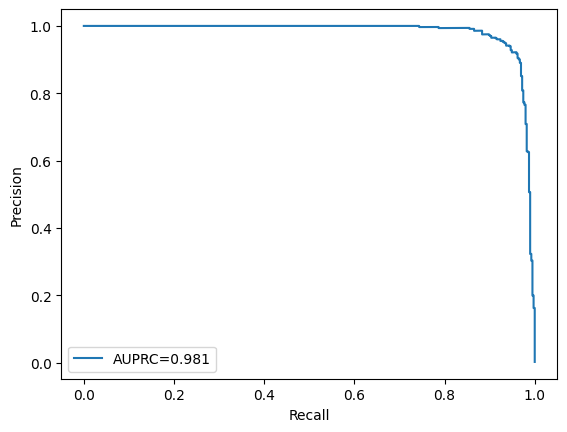

Threshold: 0.2540
Precision: 0.9395
Recall: 0.9467
F1_scores : 0.9431


In [73]:
# Evaluate the model(Train):
model.eval()
targets_list = []
predicted_list = []

with torch.no_grad():
    for features, targets in train_loader:
        features = features.unsqueeze(1)
        targets = targets
        logits = model(features)
        predicted = torch.sigmoid(logits).cpu().numpy()

        targets_list.extend(targets.cpu().numpy())
        predicted_list.extend(predicted)

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(targets_list, predicted_list)

# Compute AUPRC score
auprc = auc(recall, precision)

# Plot the AUPRC curve
import matplotlib.pyplot as plt
plt.plot(recall, precision, label=f'AUPRC={auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Find and plot the optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
#plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold={optimal_threshold:.3f}')
plt.legend()

plt.show()


# Find the index of the optimal threshold based on F1 score
optimal_idx = np.argmax(f1_scores)

# Find the optimal threshold and print the corresponding precision and recall
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]

print(f'Threshold: {optimal_threshold:.4f}')
print(f'Precision: {optimal_precision:.4f}')
print(f'Recall: {optimal_recall:.4f}')
print(f'F1_scores : {2 * (optimal_precision * optimal_recall) / (optimal_precision + optimal_recall) :.4f}')

In [74]:
# Evaluate the model(Testing):

model.eval()
targets_list = []
predicted_list = []

with torch.no_grad():
    for features, targets in test_loader:
        features = features.unsqueeze(1)
        targets = targets
        logits = model(features)
        predicted = torch.sigmoid(logits).round()

        targets_list.extend(targets.cpu().numpy())
        predicted_list.extend(predicted.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(targets_list, predicted_list)
precision = precision_score(targets_list, predicted_list)
recall = recall_score(targets_list, predicted_list)
f1 = f1_score(targets_list, predicted_list)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.9995
Precision: 0.9367
Recall: 0.7551
F1 Score: 0.8362


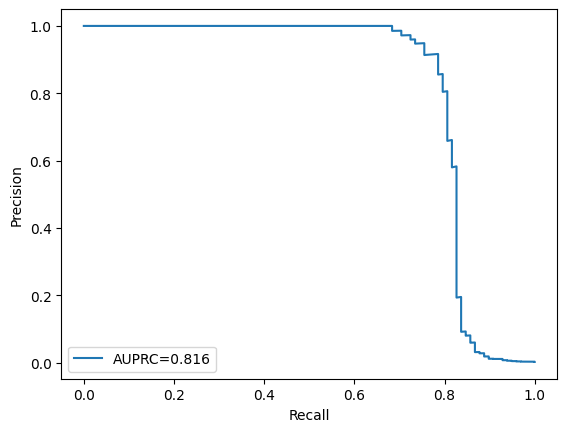

Threshold: 0.3726
Precision: 0.9167
Recall: 0.7857
F1_scores : 0.8462


In [75]:
# Evaluate the model(Testing):

model.eval()
targets_list = []
predicted_list = []

with torch.no_grad():
    for features, targets in test_loader:
        features = features.unsqueeze(1)
        targets = targets
        logits = model(features)
        predicted = torch.sigmoid(logits).cpu().numpy()

        targets_list.extend(targets.cpu().numpy())
        predicted_list.extend(predicted)

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(targets_list, predicted_list)

# Compute AUPRC score
auprc = auc(recall, precision)

# Plot the AUPRC curve
import matplotlib.pyplot as plt
plt.plot(recall, precision, label=f'AUPRC={auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Find and plot the optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
#plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold={optimal_threshold:.3f}')
plt.legend()

plt.show()


# Find the index of the optimal threshold based on F1 score
optimal_idx = np.argmax(f1_scores)

# Find the optimal threshold and print the corresponding precision and recall
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]

print(f'Threshold: {optimal_threshold:.4f}')
print(f'Precision: {optimal_precision:.4f}')
print(f'Recall: {optimal_recall:.4f}')
print(f'F1_scores : {2 * (optimal_precision * optimal_recall) / (optimal_precision + optimal_recall) :.4f}')
